#  Implementing PCA(Principal Component Analysis) on MNIST Dataset

## Importing our mandatory python libraries which are required for the implementation of PCA.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading our MNIST dataset from our computer which is stored in .csv format. 

In [146]:
df = pd.read_csv('mnist_train.csv')
print("the shape of data is :", df.shape)

the shape of data is : (42000, 785)


In [147]:
#Displaying first few data's
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting label column from the dataset

## Plotting a random sample data point from The dataset using matplotlib imshow() method

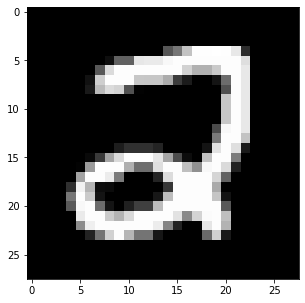

The above values is 2


In [148]:
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print('The above values is',label[ind])

# 2D Visualization using PCA

## Picking first 20K data-points out of 42k data-points to work on for time-effeciency.

In [149]:
labels = label.head(20000)
data = df.head(20000)
print("the shape of sample data = ", data.shape)

the shape of sample data =  (20000, 784)


## Data-preprocessing : standardizing tha dataset


In [150]:
#Column standardization of our dataset using StandardScalar class of sklearn.preprocessing module.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(42000, 784)

## Finding the Co-Variance matrix which is AT * A using NumPy matmul method

In [151]:
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

### After multiplication, the dimensions of our Co-Variance matrix is 784 * 784 ,because AT(784 * 20000) * A(20000 * 784).

## Finding the top two Eigen-values and corresponding eigenvectors for projecting onto a 2D surface.  

In [152]:
#converting the eigenvectors into (2,d) form for easiness of further computations
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


### here the vectors[1] represent the eigenvector corresponding 1st principal eigenvector

### here the vectors[0] represent the eigenvector corresponding 2nd principal eigenvector

### If we multiply the two top vectors to the Co-Variance matrix, we found our two principal components PC1 and PC2.

In [153]:
final_df = np.matmul(vectors, std_df.T)
print(" vectros:", vectors.shape,"\n", "std_df:", std_df.T.shape,"\n", "final_df:", final_df.shape)

 vectros: (2, 784) 
 std_df: (784, 42000) 
 final_df: (2, 42000)


### Now we vertically stack our final_df and label and then Transpose them,then we found the NumPy data table so with the help of pd.DataFraame we create the data frame of our two components with class labels. 

In [154]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['1st_principle component analysis', '2nd_principle component analysis', 'label'])
dataFrame

,1st_principle component analysis,2nd_principle component analysis,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


## visualizing the final data with help of the seaborn FacetGrid method.

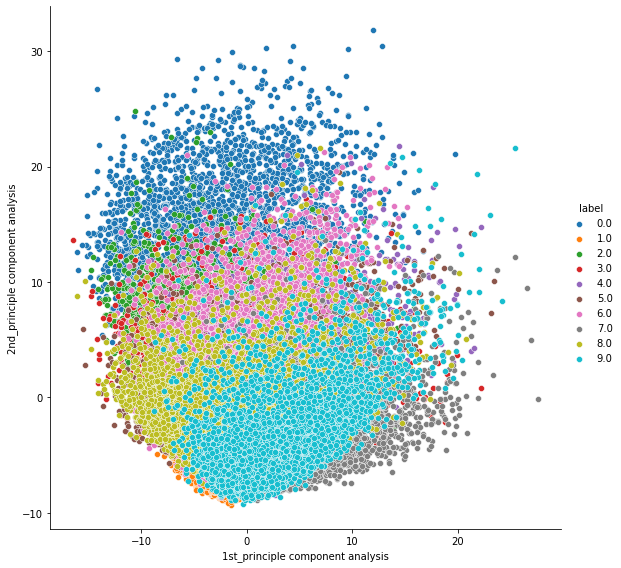

In [155]:
sns.FacetGrid(dataFrame, hue = 'label', height = 8).map(sns.scatterplot, '1st_principle component analysis', '2nd_principle component analysis').add_legend()
plt.show()

## Visualized data of PCA on MNIST dataset 

# -------------------------------------------------------------------------------------------------

# PCA for dimensionality redcution

In [156]:
# using SKlearn importing PCA
from sklearn import decomposition
pca = decomposition.PCA()

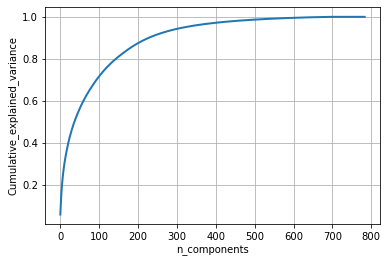

In [157]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(std_df)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

In [158]:
# directly entering parameters 
pca.n_components = 2
pca_data = pca.fit_transform(std_df)

print('shape of pca_reduced data = ',pca_data.shape)

shape of pca_reduced data =  (42000, 2)


In [161]:
# Data massaging - adding label colomn to the reduced matrix
pca_data = np.vstack((pca_data.T,label)).T


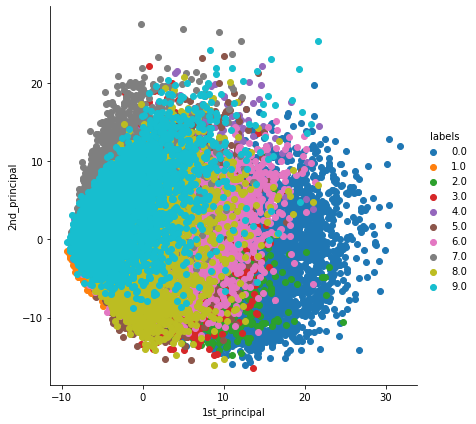

In [162]:
# dataframing and plotting the pca data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))
sns.FacetGrid(pca_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()